In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

In [4]:
file = pd.read_csv(r"C:\Users\User\Desktop\Data Science\Projects Dataset\datasets\historical_data.csv")

In [5]:
pd.set_option("display.max_columns", None)

In [6]:
file.shape

(197428, 16)

In [7]:
file.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [8]:
file.duplicated().sum()

0

In [9]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [10]:
file.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [11]:
file.created_at = pd.to_datetime(file.created_at)
file.actual_delivery_time = pd.to_datetime(file.actual_delivery_time)

In [12]:
file.store_primary_category.unique()

array(['american', 'mexican', nan, 'indian', 'italian', 'sandwich',
       'thai', 'cafe', 'salad', 'pizza', 'chinese', 'singaporean',
       'burger', 'breakfast', 'mediterranean', 'japanese', 'greek',
       'catering', 'filipino', 'convenience-store', 'other', 'korean',
       'vegan', 'asian', 'barbecue', 'fast', 'dessert', 'smoothie',
       'seafood', 'vietnamese', 'cajun', 'steak', 'middle-eastern',
       'soup', 'vegetarian', 'persian', 'nepalese', 'sushi',
       'latin-american', 'hawaiian', 'chocolate', 'burmese', 'british',
       'pasta', 'alcohol', 'dim-sum', 'peruvian', 'turkish', 'malaysian',
       'ethiopian', 'afghan', 'bubble-tea', 'german', 'french',
       'caribbean', 'gluten-free', 'comfort-food', 'gastropub',
       'pakistani', 'moroccan', 'spanish', 'southern', 'tapas', 'russian',
       'brazilian', 'european', 'cheese', 'african', 'argentine',
       'kosher', 'irish', 'lebanese', 'belgian', 'indonesian',
       'alcohol-plus-food'], dtype=object)

# Feature Engineering

To get the exact hour, minute and second in which the order was created, I would split the created_at column into three different columns, after which i would drop the original column.

In [13]:
file["created_at_hour"] = file.created_at.dt.hour
file["created_at_min"] = file.created_at.dt.minute
file["created_at_sec"] = file.created_at.dt.second

To get the exact time in seconds taken to deliver an order i would subtract the time the order was created from the actual_delivery_time. Also i would creat a new column called "non_preparation_time" 

In [14]:
file["total_delivery_time(sec)"] = (file.actual_delivery_time - file.created_at).dt.total_seconds()

In [15]:
file["non_preparation_time"] = (file.estimated_order_place_duration + file.estimated_store_to_consumer_driving_duration)

In [16]:
file.drop(columns = ['created_at', 'actual_delivery_time'], inplace = True)

I would create two new columns to capture the ration of busy dasher and the ratio of outstanding order.This would help us determine the ratio of riders who are not avalaible to deliver orders at any point in time.

In [17]:
file['busy_dasher_ratio'] = file.total_busy_dashers/file.total_onshift_dashers
file['outstanding_order_ratio'] = file.total_outstanding_orders/file.total_onshift_dashers

In [18]:
#store_id_unique = file.store_id.unique().tolist()
#store_id_and_category = {store_id: file[file.store_id == store_id].store_primary_category.mode()
#                        for store_id in store_id_unique}

To fil the missing values in store_primary_category,i would use the most frequent value in the store_primary_category for each store_id.This reduced the number of missing values significantlly.

In [19]:
grp = file.groupby('store_id')['store_primary_category'].agg([pd.Series.mode])

In [20]:
file_new = pd.DataFrame()

for i in (grp.index):
    df = file[file["store_id"] == i].copy()
    try:
        df.fillna({'store_primary_category' : grp.loc[i][0]}, inplace = True)
    except:
        if (len(grp.loc[i][0])) != 0:
            df.fillna({'store_primary_category' : grp.loc[i][0][0]}, inplace = True)
        else:
            pass
    file_new = pd.concat([file_new, df])

In [21]:
file_new.isna().sum()

market_id                                         987
store_id                                            0
store_primary_category                            867
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
created_at_hour                                     0
created_at_min                                      0
created_at_sec                                      0
total_delivery_time(sec)                            7
non_preparation_time        

Creating the busy_dasher_ratio and outstanding_order_ratio introduced some infinity values in the dataset, i would replace these values with Null.

In [22]:
file_new.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,created_at_hour,created_at_min,created_at_sec,total_delivery_time(sec),non_preparation_time,busy_dasher_ratio,outstanding_order_ratio
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000,197428.000000,197428.000000,197428.000000,1.974210e+05,196902.000000,1.775900e+05,1.777470e+05
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935,8.467213,29.562985,29.577370,2.908257e+03,853.939183,NaN,inf
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902,8.658759,17.276819,17.281836,1.922961e+04,235.112835,NaN,NaN
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.010000e+02,153.000000,-inf,-1.600000e+01
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,2.000000,15.000000,15.000000,2.104000e+03,683.000000,8.269231e-01,9.411765e-01
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,3.000000,29.000000,30.000000,2.660000e+03,850.000000,9.622642e-01,1.200000e+00
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,19.000000,45.000000,45.000000,3.381000e+03,1017.000000,1.000000e+00,1.480000e+00
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,23.000000,59.000000,59.000000,8.516859e+06,3222.000000,inf,inf


In [23]:
file_new.replace([np.inf, -np.inf], np.nan, inplace=True)

In [24]:
file_new.dropna(inplace=True)

## Creating Dummies Variables

In [25]:
protocol_dummies = pd.get_dummies(file_new['order_protocol'], prefix = "protocol_",  drop_first=True)
market_id_dummies = pd.get_dummies(file_new['market_id'], prefix = "market_", drop_first=True)
#store_primary_dummies = pd.get_dummies(file_new['store_primary_category'], drop_first=True)

In [26]:
train_df = pd.get_dummies(file_new)
train_df.drop(columns  = ['order_protocol', 'market_id', 'store_id'], inplace = True)

In [27]:
train_df = pd.concat([train_df, protocol_dummies, market_id_dummies], axis = 'columns')

<AxesSubplot:>

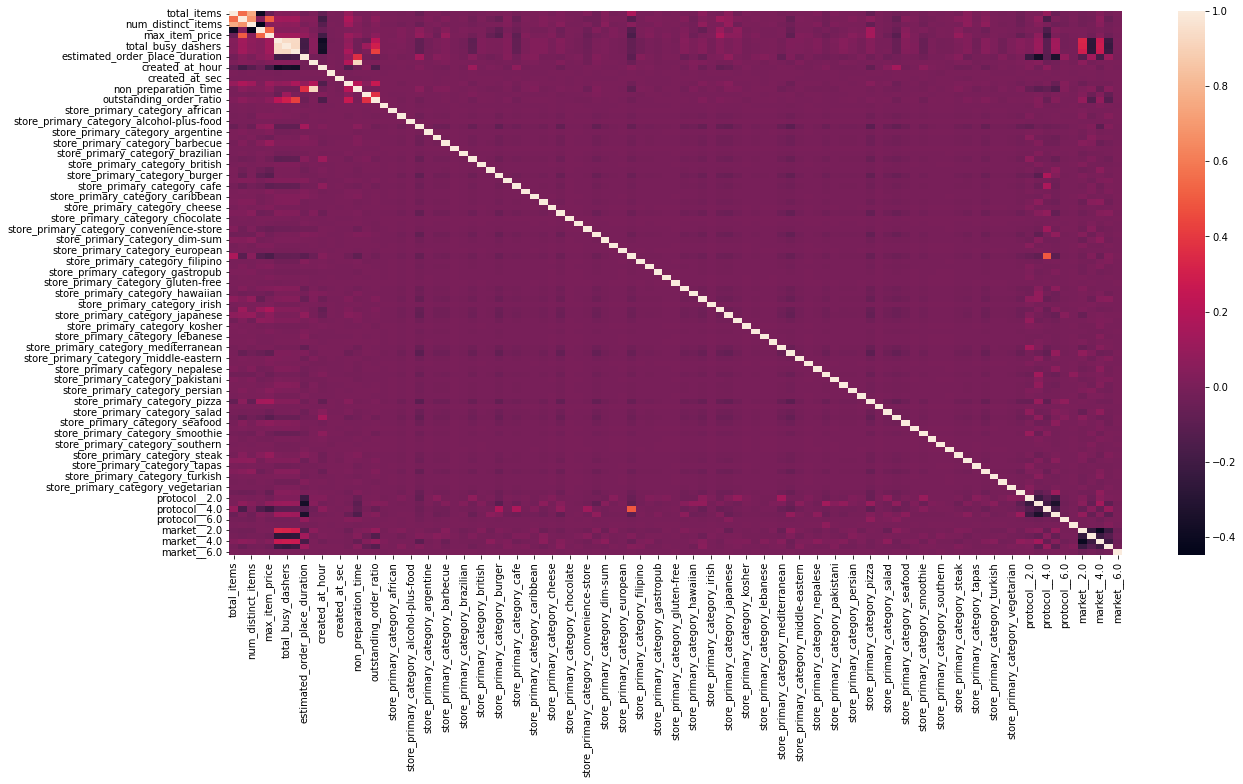

In [28]:
plt.figure(figsize = (20, 10))
sns.heatmap((pd.get_dummies(train_df)).corr())

# Removing Redundancy

The number of columns has become larged from the previous processes.Thus, i would remove columns that are highly correlated or do not serve purpose to the to the model

In [29]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return (pairs_to_drop)

In [30]:
def get_top_abs_correlations(df, n = 5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels = labels_to_drop).sort_values(ascending = False)
    return au_corr[0:n]

In [31]:
print("Top Absolute Correlation")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlation
total_onshift_dashers                         total_busy_dashers          0.941614
                                              total_outstanding_orders    0.934581
total_busy_dashers                            total_outstanding_orders    0.931191
estimated_store_to_consumer_driving_duration  non_preparation_time        0.923235
total_items                                   num_distinct_items          0.757776
subtotal                                      num_distinct_items          0.683078
total_items                                   subtotal                    0.556179
min_item_price                                max_item_price              0.540647
subtotal                                      max_item_price              0.508069
store_primary_category_fast                   protocol__4.0               0.492713
num_distinct_items                            min_item_price              0.447000
total_outstanding_orders                      outstanding_orde

In [32]:
train_df.drop(columns = ['total_onshift_dashers', 'total_busy_dashers','non_preparation_time',
                       ], inplace= True)

In [33]:
print("Top Absolute Correlation")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlation
total_items                     num_distinct_items         0.757776
subtotal                        num_distinct_items         0.683078
total_items                     subtotal                   0.556179
min_item_price                  max_item_price             0.540647
subtotal                        max_item_price             0.508069
store_primary_category_fast     protocol__4.0              0.492713
num_distinct_items              min_item_price             0.447000
total_outstanding_orders        outstanding_order_ratio    0.420356
market__2.0                     market__4.0                0.406737
total_items                     min_item_price             0.389236
total_outstanding_orders        created_at_hour            0.370427
busy_dasher_ratio               outstanding_order_ratio    0.368053
estimated_order_place_duration  protocol__3.0              0.365092
protocol__3.0                   protocol__5.0              0.336150
estimated_order_place_d

In [34]:
train_df = pd.get_dummies(file_new)
train_df.drop(columns  = ['order_protocol', 'market_id', 'store_id'], inplace = True)

In [35]:
train_df = pd.concat([train_df, protocol_dummies], axis = 'columns')

In [36]:
train_df.drop(columns = ['total_onshift_dashers', 'total_busy_dashers','non_preparation_time',
                        ], inplace= True)

In [37]:
print("Top Absolute Correlation")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlation
total_items                     num_distinct_items         0.757776
subtotal                        num_distinct_items         0.683078
total_items                     subtotal                   0.556179
min_item_price                  max_item_price             0.540647
subtotal                        max_item_price             0.508069
store_primary_category_fast     protocol__4.0              0.492713
num_distinct_items              min_item_price             0.447000
total_outstanding_orders        outstanding_order_ratio    0.420356
total_items                     min_item_price             0.389236
total_outstanding_orders        created_at_hour            0.370427
busy_dasher_ratio               outstanding_order_ratio    0.368053
estimated_order_place_duration  protocol__3.0              0.365092
protocol__3.0                   protocol__5.0              0.336150
estimated_order_place_duration  protocol__5.0              0.333986
total_delivery_time(sec

In [38]:
train_df = pd.get_dummies(file_new)
train_df.drop(columns  = ['order_protocol', 'market_id', 'store_id'], inplace = True)

In [39]:
train_df.drop(columns = ['total_onshift_dashers', 'total_busy_dashers','non_preparation_time',
                        ], inplace= True)

In [40]:
print("Top Absolute Correlation")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlation
total_items                                   num_distinct_items                0.757776
subtotal                                      num_distinct_items                0.683078
total_items                                   subtotal                          0.556179
min_item_price                                max_item_price                    0.540647
subtotal                                      max_item_price                    0.508069
num_distinct_items                            min_item_price                    0.447000
total_outstanding_orders                      outstanding_order_ratio           0.420356
total_items                                   min_item_price                    0.389236
total_outstanding_orders                      created_at_hour                   0.370427
busy_dasher_ratio                             outstanding_order_ratio           0.368053
total_delivery_time(sec)                      outstanding_order_ratio           0.262

In [41]:
train_df['distinct_items_ratio'] = train_df['num_distinct_items']/train_df['total_items']
train_df['avg_price'] = train_df['subtotal']/train_df['total_items']
print("Top Absolute Correlation")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlation
min_item_price                avg_price                  0.860499
max_item_price                avg_price                  0.770403
total_items                   num_distinct_items         0.757776
subtotal                      num_distinct_items         0.683078
total_items                   subtotal                   0.556179
min_item_price                max_item_price             0.540647
subtotal                      max_item_price             0.508069
num_distinct_items            min_item_price             0.447000
total_items                   distinct_items_ratio       0.445159
total_outstanding_orders      outstanding_order_ratio    0.420356
total_items                   min_item_price             0.389236
total_outstanding_orders      created_at_hour            0.370427
busy_dasher_ratio             outstanding_order_ratio    0.368053
total_items                   avg_price                  0.310571
num_distinct_items            avg_price            

In [42]:
train_df['price_range'] = train_df['max_item_price'] - train_df['min_item_price']
train_df.drop(columns=['max_item_price', 'min_item_price', 'subtotal', 'num_distinct_items'], inplace=True)
print("Top Absolute Correlation")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlation
total_items                                   distinct_items_ratio               0.445159
total_outstanding_orders                      outstanding_order_ratio            0.420356
                                              created_at_hour                    0.370427
busy_dasher_ratio                             outstanding_order_ratio            0.368053
total_items                                   price_range                        0.332984
                                              avg_price                          0.310571
total_delivery_time(sec)                      outstanding_order_ratio            0.262607
distinct_items_ratio                          avg_price                          0.226600
store_primary_category_pizza                  avg_price                          0.214630
estimated_store_to_consumer_driving_duration  total_delivery_time(sec)           0.188231
total_outstanding_orders                      estimated_order_place_duratio

In [44]:
X = train_df.copy()
X.drop(columns = 'total_delivery_time(sec)', inplace=True)
Y = train_df['total_delivery_time(sec)']

In [45]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor 
from sklearn.metrics import mean_squared_error

# Calculating the prep time

In [46]:
train_df['prep_time'] = train_df["total_delivery_time(sec)"] - (train_df['estimated_store_to_consumer_driving_duration'] + train_df["estimated_order_place_duration"])

In [47]:
X_new = train_df.copy()
X_new.drop(columns = ['estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration', 'prep_time'], inplace=True)
Y_new = train_df['prep_time']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=42)

In [49]:
model = XGBRegressor()

In [50]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [51]:
y_pred = model.predict(X_test)

In [52]:
df = pd.concat([train_df.loc[X_test.index].reset_index(), pd.Series(y_pred).rename("prep_time_pred")], axis =1)

In [53]:
X = df.copy()
X.drop(columns = ["prep_time","total_delivery_time(sec)"], inplace =True)
y = df['total_delivery_time(sec)']

# Modelling

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [56]:
model.score(X_test,y_test)

0.9980026020737535

In [57]:
y_pred = model.predict(X_test)

In [58]:
mean_squared_error(y_test, y_pred, squared=False)

52.576808637903504

In [59]:
pd.concat([(df.loc[X_test.index]['total_delivery_time(sec)']).reset_index(), pd.Series(y_pred).rename('pred_total_delivery_time(sec)')], axis = 1).head(50)

,index,total_delivery_time(sec),pred_total_delivery_time(sec)
0,10413,1828.0,1830.179321
1,19134,3079.0,3083.905518
2,19424,1514.0,1540.971069
3,20244,3360.0,3342.465820
4,25926,1886.0,1895.708252
5,2767,1709.0,1670.442139
6,19431,2419.0,2429.296143
7,17469,4797.0,4804.127930
8,21280,3485.0,3447.456055
9,28658,3437.0,3462.149658
